In [23]:
!pip install seaborn==0.11.0

     |████████████████████████████████| 283 kB 19.8 MB/s eta 0:00:01


In [ ]:
import pandas as pd 
import numpy as np 
import json 
from collections import Counter 
from pandas.io.json import json_normalize 
from matplotlib import pyplot as plt
from matplotlib import colors 
from matplotlib.colors import rgb2hex 
import seaborn as sns

with open('/opt/ml/detection/dataset/train.json') as json_data:
    data = json.load(json_data)

df_imgs = pd.DataFrame(data['images'])
df_cats = pd.DataFrame(data['categories'])
df_annos = pd.DataFrame(data['annotations'])
category= ['General Trash', 'Paper', 'Paper pack', 'Metal', 'Glass', 'Plastic', 'Styrofoam', 'Plastic bag', 'Battery', 'Clothing']
label_colors = ['black', 'darkcyan', 'sienna', 'gray', 'navy', 'chartreuse', 'firebrick', 'seagreen', 'darkorchid', 'olivedrab']
print('finished')

1047961    33
1048064     8
1877        6
1496        5
2760        5
           ..
4502        1
73191       1
10556       1
8961        1
149633      1
Name: area, Length: 20532, dtype: int64
0
1048371
100236.28759984415
47864.5


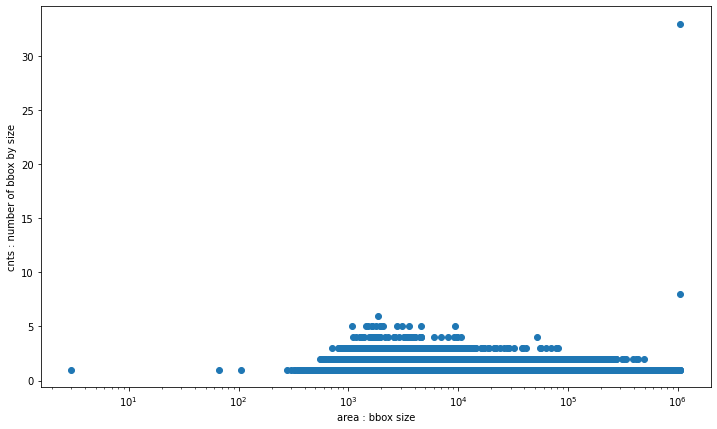

In [105]:
def set_text(ax, data, size=10):
    rects = ax.patches
    labels = data
    
    for rect, label in zip(rects, labels):
        height = rect.get_height()
        ax.text(
            rect.get_x() + rect.get_width() / 2,  height+5, label, ha="center", va="bottom", size=size
        )

        
# annotations - area : 객체가 존재하는 박스의 크기
img_areas = df_annos['area'].astype(int).value_counts() # 박스크기 : 크기가 같은 것의 개수 
print(img_areas)
img_areas = dict(img_areas)
img_areas = sorted(img_areas.items(), key=lambda x:x[0])

areas, cnts = list(zip(*img_areas))

print(np.min(areas)) # 0 (0에 가까운 수가 있다)
print(np.max(areas)) # 1048371 (1024*1024에 가까운 수)
print(np.mean(areas)) # 100236.28759984415
print(np.median(areas)) # 47864.5

fig, ax = plt.subplots(figsize=(12,7))
ax.scatter(areas, cnts)
ax.set_xlabel('area : bbox size')
ax.set_ylabel('cnts : number of bbox by size')
plt.xscale('log')
plt.show()

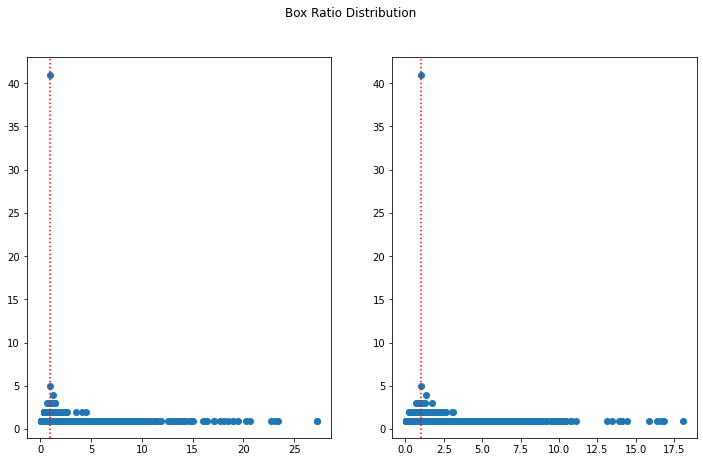

In [107]:
def get_box_ratio(bbox):
    x_min, y_min, w, h = bbox
    ratio = w / h
    return ratio

def get_box_ratio2(bbox):
    x_min, y_min, w, h = bbox
    ratio = h / w
    return ratio
    

bbox_list = df_annos['bbox'].tolist()
ratio_list = [get_box_ratio(bbox) for bbox in bbox_list]

counter = sorted(Counter(ratio_list).items(), key = lambda x : x[0])
ratios, cnts = list(zip(*counter))

fig, ax = plt.subplots(1, 2, figsize=(12,7))
fig.suptitle('Box Ratio Distribution')
ax[0].scatter(ratios, cnts)
ax[0].axvline(x=1, color='r', linestyle=':')

bbox_list = df_annos['bbox'].tolist()
ratio_list = [get_box_ratio2(bbox) for bbox in bbox_list]

counter = sorted(Counter(ratio_list).items(), key = lambda x : x[0])
ratios, cnts = list(zip(*counter))

ax[1].scatter(ratios, cnts)
ax[1].axvline(x=1, color='r', linestyle=':')
plt.show()

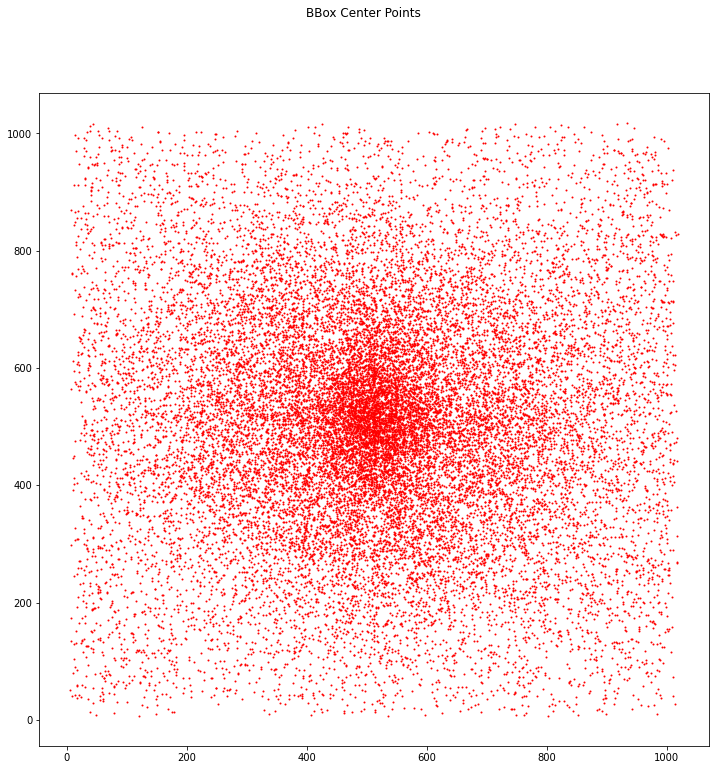

In [46]:
def get_center_point(bbox):
    x_min, y_min, w, h = bbox
    return (x_min + w/2, y_min + h/2)

bbox_list = df_annos['bbox'].tolist()
cp_list = [get_center_point(bbox) for bbox in bbox_list]

xcs, ycs = list(zip(*cp_list))

fig, ax = plt.subplots(figsize=(12,12))
fig.suptitle('BBox Center Points')
ax.scatter(xcs, ycs, s=1, color='red')
plt.show()

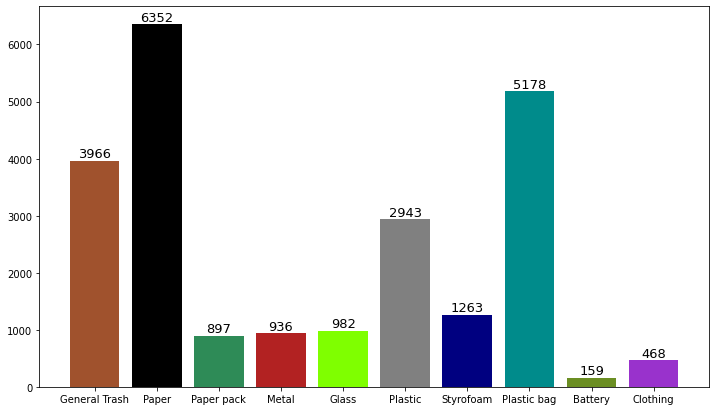

In [ ]:
df_cat = df_annos.value_counts('category_id')
fig, ax = plt.subplots(figsize=(12,7))
ax.bar(df_cat.keys(), df_cat.values, color=label_colors)
plt.xticks(np.arange(10), category)
set_text(ax, df_cat.values, size=13)
plt.show()

sml   
large     17636
medium     5195
small       313
dtype: int64
23144


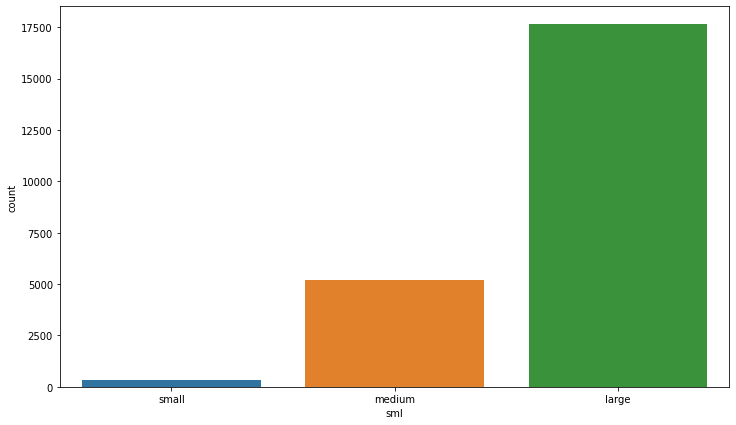

In [41]:
newdf = pd.DataFrame()
newdf['sml'] = df_annos['area'].astype(int).apply(lambda x: 'small' if x < 32*32 else "large" if x > 96*96 else "medium")
y = (newdf.value_counts())
print(y)
print(sum(y))
fig, ax = plt.subplots(figsize=(12,7))
sns.countplot(x='sml', data=newdf, order=['small', 'medium', 'large'])
# ax.text(-0.4, max(y)*0.3, f'all boxes = {sum(y)}', size=20)
plt.show()


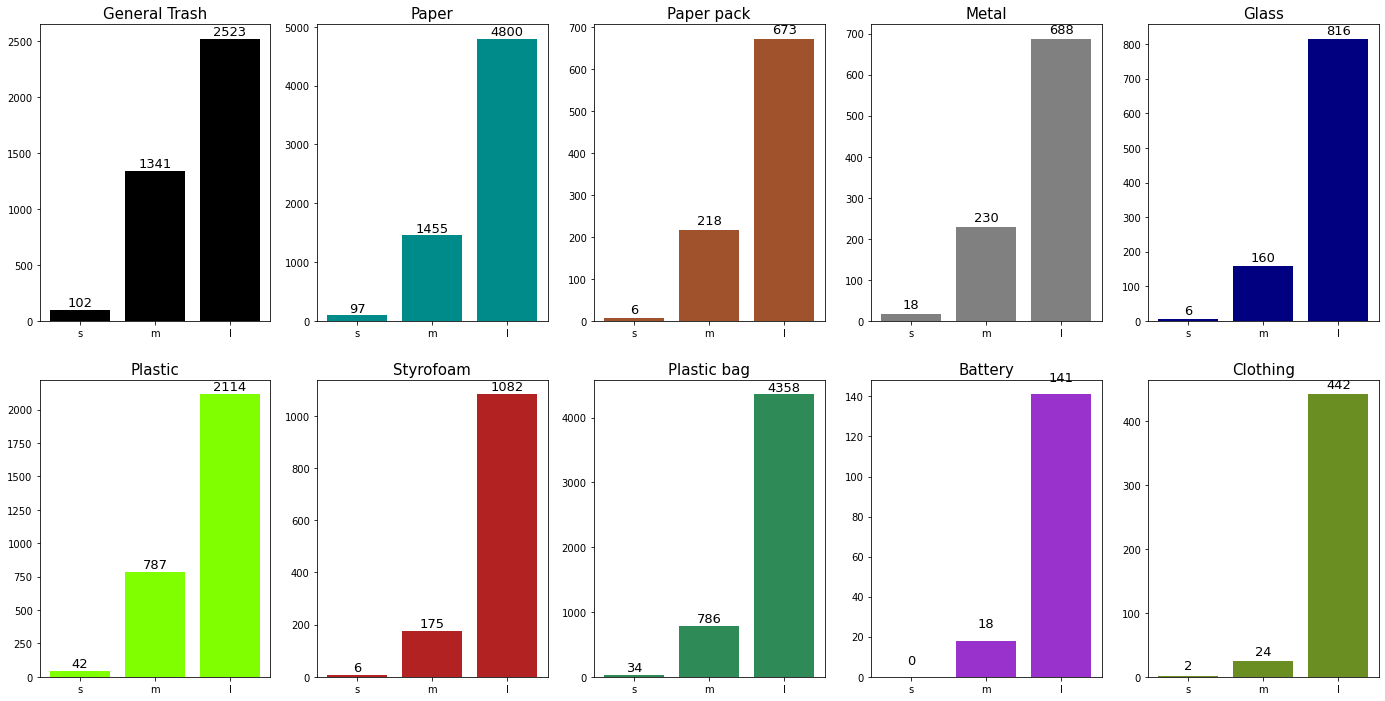

In [85]:
fig, ax = plt.subplots(2,5, figsize=(24,12))
axx = 0
axy = 0
for cat in range(len(category)):
    df_cat = df_annos[df_annos['category_id'] == cat]
    
    area_rng = df_cat['area'].astype(int)
    small = area_rng < 32*32
    medium = (area_rng >= 32*32 ) & (area_rng < 96*96)
    large = area_rng >= 96*96
    
    x = ['s', 'm', 'l']
    y = [len(area_rng[small]), len(area_rng[medium]), len(area_rng[large])]
    
    ax[axy][axx].set_title(category[cat], size=15)
    ax[axy][axx].bar(x, y,color=label_colors[cat])
    set_text(ax[axy][axx], y, size=13)
    axx += 1
    if axx == 5 : 
        axy += 1
        axx = 0
plt.show()